# Exercise: Image Manipulation in OpenCV

---

Prof. Dr.-Ing. Antje Muntzinger, Hochschule für Technik Stuttgart

antje.muntzinger@hft-stuttgart.de

---

In this notebook, we practice some basic image manipulation techniques in OpenCV. These are the foundation of later computer vision applications. Your tasks are the following: 

- Examine the image shape
- Split the three color channels
- Flip the image horizontally and vertically
- Draw on the image
- Resize the image

In [5]:
# imports
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Data Acquision

**TODO:** Make sure the image below is loaded and displayed correctly. You don't have to change the code, but make sure your image is correctly named and placed in a subfolder called `images` of the working directory.

In [6]:
# load image
input_img = cv2.imread ('../images/san_francisco_bay.jpg') 

# convert image to RGB and grayscale (matplotlib uses RGB, OpenCV uses BGR)
img_RGB = cv2.cvtColor(input_img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)

Text(0.5, 1.0, ' San Francisco Bay')

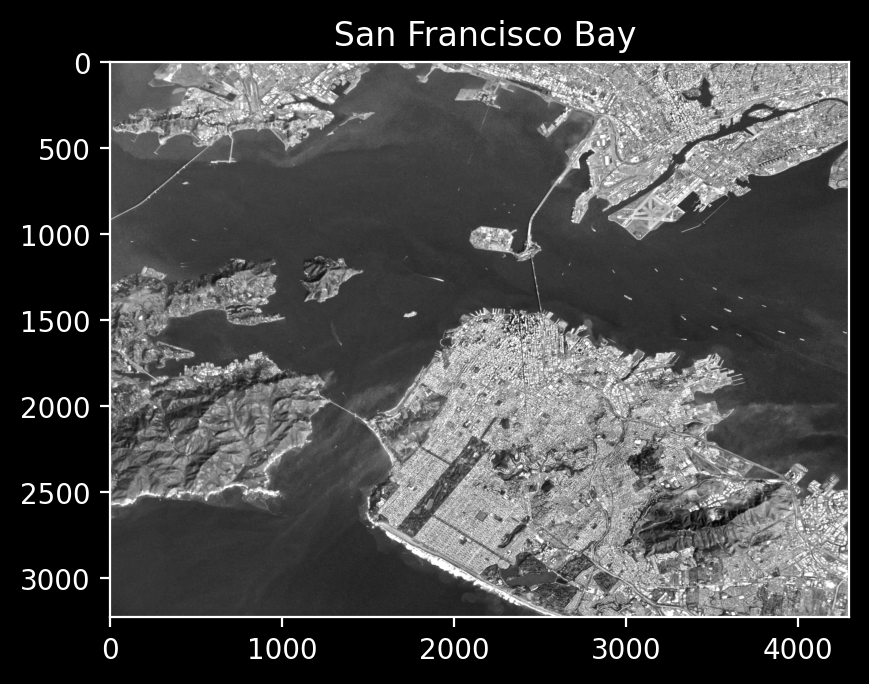

In [7]:
# display image
plt.imshow(img_gray, cmap='gray')
plt.title(' San Francisco Bay')

## 2. Image Manipulation and Preprocessing

**TODO**: Find out the size of the image using the `shape` attribute of the image array and print it. Note that images in OpenCV are basically numpy arrays. How do you interpret the output?

In [19]:
# YOUR CODE GOES HERE

print("img_RGB:", img_RGB.shape[0], "Pixel in der Höhe")
print("img_RGB:", img_RGB.shape[1], "Pixel in der Breite")
print("img_RGB:", img_RGB.shape[2], "Farbkanäle")
print("img_gray:", img_gray.shape[0], "Pixel in der Höhe")
print("img_gray:", img_gray.shape[1], "Pixel in der Breite")

img_RGB: 3224 Pixel in der Höhe
img_RGB: 4299 Pixel in der Breite
img_RGB: 3 Farbkanäle
img_gray: 3224 Pixel in der Höhe
img_gray: 4299 Pixel in der Breite


**TODO**: Split the image in the three color channels and plot them separately in matplotlib. You can use OpenCV's split function (see for example here: https://www.geeksforgeeks.org/splitting-and-merging-channels-with-python-opencv/). Can you see from the images which color channel is which?

**HINT:** Use `cmap = 'gray'` in `imshow` to display the channels correctly as grayscale images. In case you want to plot several images without `plt.subplots`, use `plt.show()` after each `plt.imshow` command (otherwise only the last image is displayed).

(-0.5, 4298.5, 3223.5, -0.5)

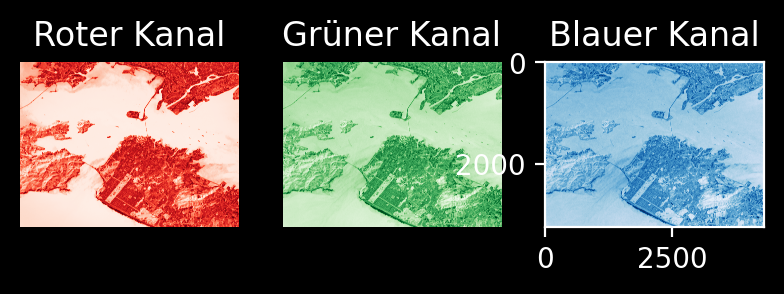

In [27]:
# YOUR CODE GOES HERE

img_R, img_G, img_B = cv2.split(img_RGB)
fig, (ax1, ax2, ax3) = plt.subplots(1,3)
ax1.imshow(img_R, cmap='Reds')
ax1.set_title("Roter Kanal")
ax1.axis("off")
ax2.imshow(img_G, cmap='Greens')
ax2.set_title("Grüner Kanal")
ax2.axis("off")
ax3.imshow(img_B, cmap='Blues')
ax3.set_title("Blauer Kanal")
ax2.axis("off")

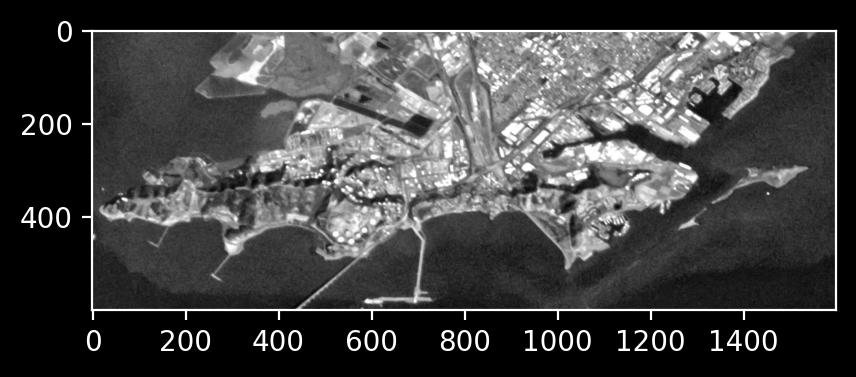

In [21]:
# we can make a cutout to work with a smaller part of the image (slicing)
cutout_RGB = img_RGB[0:600, 0:1600]
cutout_gray = cv2.cvtColor(cutout_RGB, cv2.COLOR_RGB2GRAY)
plt.imshow(cutout_gray, cmap='gray')

**TODO**: Flip the image horizontally and vertically and plot the results! Check out OpenCV's flip function for this task (see for example here: https://www.geeksforgeeks.org/python-opencv-cv2-flip-method/).

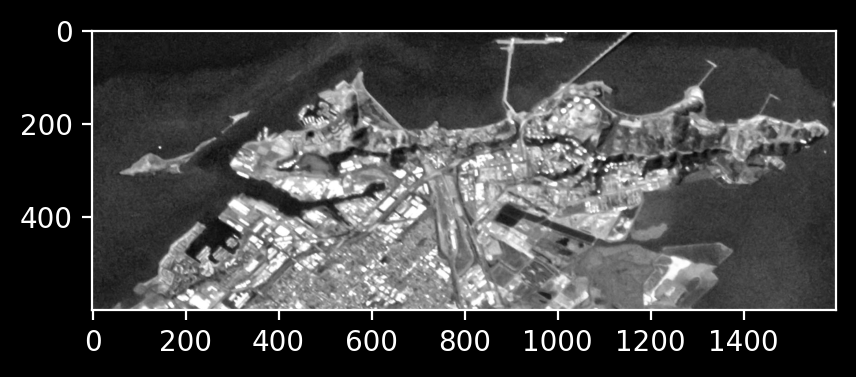

In [28]:
# YOUR CODE GOES HERE

flipped_cutout_gray = cv2.flip(cutout_gray, -1)
plt.imshow(flipped_cutout_gray, cmap='gray')

**TODO**: Draw a red rectangle around the biggest island (Angel Island) in the original image. Check the OpenCV documentation for a suitable function to use! Note that drawing on the image changes the original image, so make a copy first.

**HINT:** You can use several lines as seen in the demo, but maybe there is a simpler function?

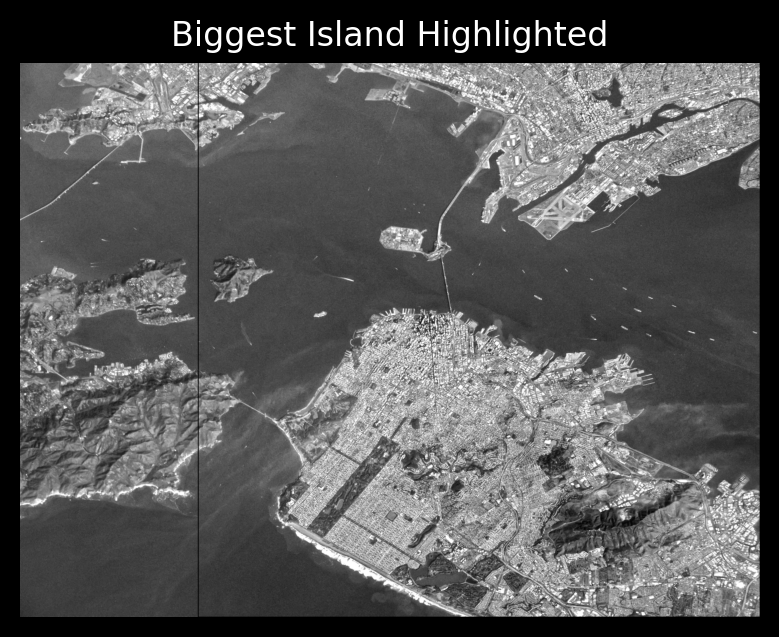

In [31]:
# YOUR CODE GOES HERE

# convert original image to grayscale
img_rectangle_island = cv2.cvtColor(img_RGB, cv2.COLOR_BGR2GRAY).copy()

# Apply thresholding to segment the island
_, thresh = cv2.threshold(img_rectangle_island, 128, 255, cv2.THRESH_BINARY)

# Find contours
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Find the largest contour (biggest island)
largest_contour = max(contours, key=cv2.contourArea)

# Get bounding box
x, y, w, h = cv2.boundingRect(largest_contour)

# Draw a red rectangle around the biggest island
cv2.rectangle(img_rectangle_island, (x, y), (x + w, y + h), (0, 0, 255), 3)

# Convert BGR to RGB for correct Matplotlib display
img_rgb = cv2.cvtColor(img_rectangle_island, cv2.COLOR_BGR2RGB)

# Show the image
plt.imshow(img_rgb)
plt.axis("off")
plt.title("Biggest Island Highlighted")
plt.show()

**TODO**: Resize the result to 400x400 pixels. 

In [9]:
# YOUR CODE GOES HERE